# Life Expectancy EDA and Prediction

**Aim:**

The objective of this project is to conduct an in-depth Exploratory Data Analysis (EDA) on a dataset containing various features related to life expectancy, including socio-economic indicators, health-related factors, and demographic variables. The primary goal is to understand the relationships between these features and life expectancy across different countries. Additionally, the project aims to build predictive models using regression algorithms to forecast life expectancy based on the available dataset.

**Outcome:**
- Comprehensive understanding of the factors influencing life expectancy based on the EDA, including insights into trends, correlations, and distributions.
- Identification of significant predictors of life expectancy through feature importance analysis.
- Trained regression models capable of predicting life expectancy based on socio-economic and health-related indicators.
- Evaluation of model performance to assess the accuracy and reliability of predictions.

**Significance:**
- Insights derived from this project can contribute to a better understanding of the determinants of life expectancy, thereby aiding policymakers, healthcare professionals, and researchers in formulating effective strategies and interventions to improve public health outcomes.
- The predictive models developed can be utilized as valuable tools for forecasting life expectancy in different populations, assisting in healthcare planning, resource allocation, and risk assessment.
- By highlighting the significance of various socio-economic and health-related factors, this project underscores the importance of addressing disparities and promoting equitable access to healthcare and education globally.
- The methodology employed in this project can serve as a framework for similar studies aimed at exploring the relationships between socio-economic indicators and health outcomes, facilitating evidence-based decision-making in public health policy and practice

### Data
- **Country:** Country
- **Year:** Year
- **Status:** Country Developed or Developing status
- **Life expectancy:** Life expectancy in age
- **Adult Mortality:** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **infant deaths:** Number of Infant Deaths per 1000 population
- **Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 
- **percentage expenditure:** Expenditure on - - health as a percentage of Gross Domestic Product per capita(%)
- **Hepatitis B:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- **Measles:** Measles - number of reported cases per 1000 population
- **BMI:** Average Body Mass Index of entire population
- **under-five deaths:** Number of under-five deaths per 1000 population
- **Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)
- **Total expenditure:** General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- **HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)
- **GDP:** Gross Domestic Product per capita (in USD)
- **Population:** Population of the country
- **thinness 1-19 years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- **thinness 5-9 years:** Prevalence of thinness among children for Age 5 to 9(%)
- **Income composition of resources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling:** Number of years of Schooling(years)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse
from sklearn.svm import SVR
import warnings

In [2]:
data = pd.read_csv('LifeExpData.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Unique Values
obj_col = data.columns
for col in obj_col:
    print("{}: {}".format(col,len(data[col].unique())))

Country: 193
Year: 16
Status: 2
Life expectancy : 363
Adult Mortality: 426
infant deaths: 209
Alcohol: 1077
percentage expenditure: 2328
Hepatitis B: 88
Measles : 958
 BMI : 609
under-five deaths : 252
Polio: 74
Total expenditure: 819
Diphtheria : 82
 HIV/AIDS: 200
GDP: 2491
Population: 2279
 thinness  1-19 years: 201
 thinness 5-9 years: 208
Income composition of resources: 626
Schooling: 174


In [8]:
def checkna(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]
checkna(data)

,Features,Missing_Values,Missing_Percent
3,Life expectancy,10,0.34
4,Adult Mortality,10,0.34
6,Alcohol,194,6.60
8,Hepatitis B,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


In [9]:
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality','infant_deaths', 'Alcohol', 
              'percentage_expenditure', 'Hepatitis_B','Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
              'Diphtheria', 'HIV/AIDS', 'GDP', 'Population','thinness', 'thinness_5-9_years',
              'Income_composition_of_resources', 'Schooling']

In [10]:
y= data["Life_expectancy"]
df=  data.drop(["Life_expectancy"], axis=1)

categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")

## Exploratory Data Analysis (EDA)

## Correlations

Skipped correlation calculation for non-numeric data between 'Life_expectancy' and Country
Correlation between Life_expectancy and Year: 0.17
Skipped correlation calculation for non-numeric data between 'Life_expectancy' and Status
Skipped correlation calculation between 'Life_expectancy' and itself.
Correlation between Life_expectancy and Adult_Mortality: -0.7
Correlation between Life_expectancy and infant_deaths: -0.2
Correlation between Life_expectancy and Alcohol: 0.4
Correlation between Life_expectancy and percentage_expenditure: 0.38
Correlation between Life_expectancy and Hepatitis_B: 0.26
Correlation between Life_expectancy and Measles: -0.16
Correlation between Life_expectancy and BMI: 0.57
Correlation between Life_expectancy and under_five_deaths: -0.22
Correlation between Life_expectancy and Polio: 0.46
Correlation between Life_expectancy and Total_expenditure: 0.22
Correlation between Life_expectancy and Diphtheria: 0.48
Correlation between Life_expectancy and HIV/AIDS: -0.

Text(0.5, 1.0, 'Correlation Matrix')

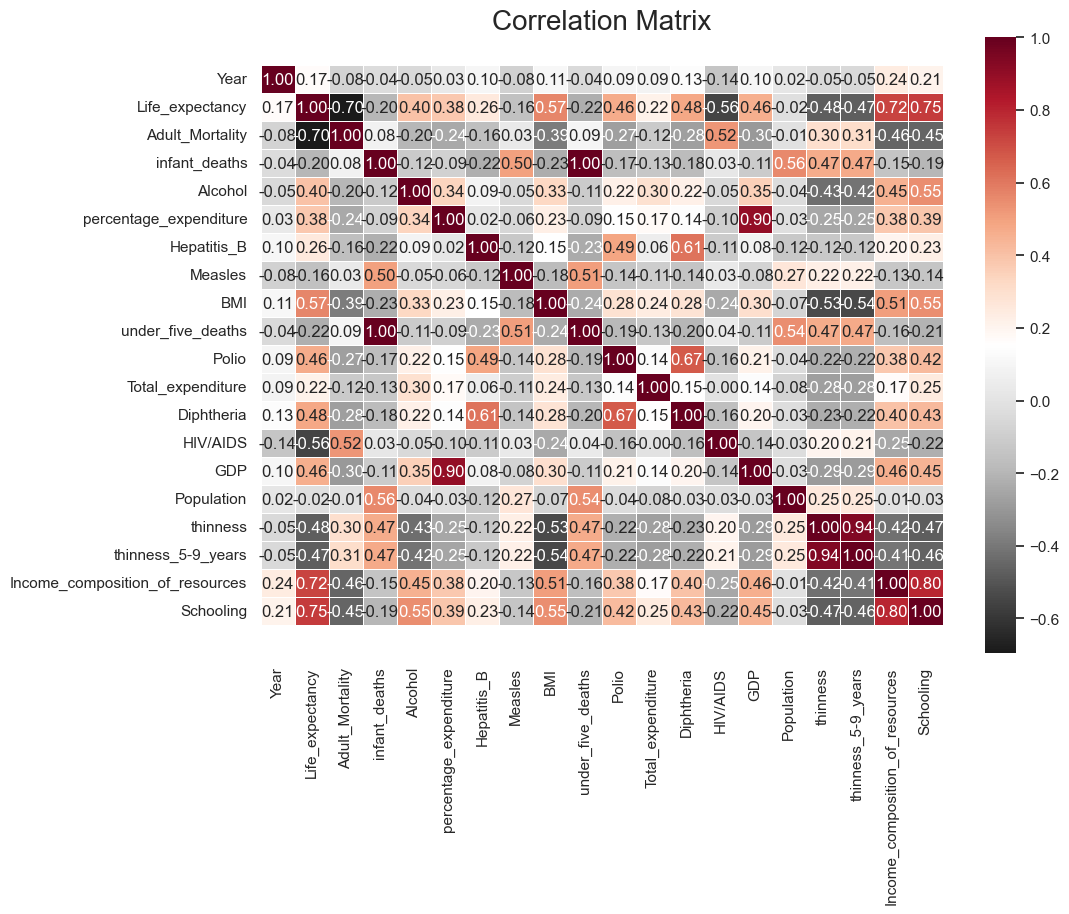

In [129]:
# Correlations between Life_expectancy and other features.
for feature in data.columns:
    if feature != 'Life_expectancy':
        if data[feature].dtype in ['int64', 'float64'] and data['Life_expectancy'].dtype in ['int64', 'float64']:
            corr = data['Life_expectancy'].corr(data[feature])
            print("Correlation between Life_expectancy and " + feature + ": " + str(round(corr, 2)))
        else:
            print("Skipped correlation calculation for non-numeric data between 'Life_expectancy' and " + feature)
    else:
        print("Skipped correlation calculation between 'Life_expectancy' and itself.")
#Correlation Matrix        
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdGy_r");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
ax.set_title('Correlation Matrix', fontsize = 20)

### Univariate Plots 

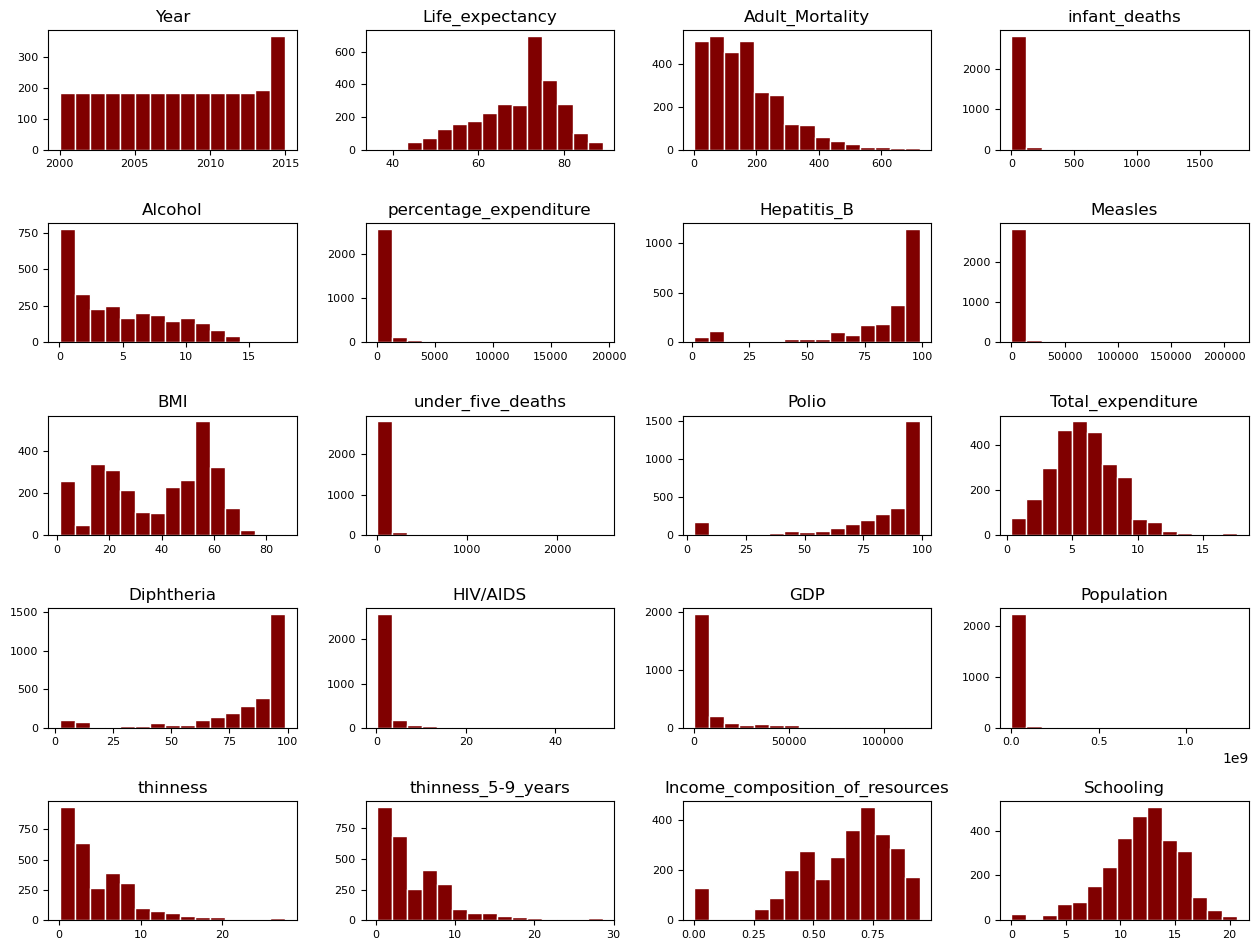

In [12]:
data.hist(bins=15, linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, edgecolor='white', color = 'Maroon')    
plt.tight_layout(rect=(0, 0, 2, 2))  

In [14]:
categorical.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [17]:
numerical.describe()

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


###  Distribution of Life Expectancy

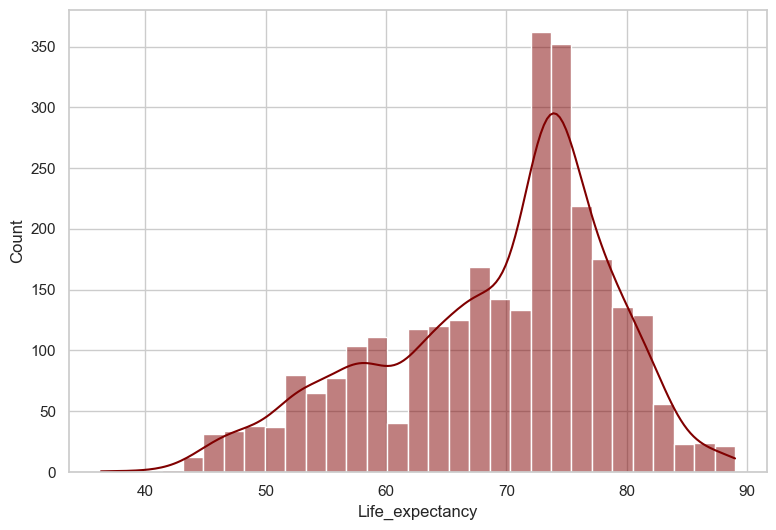

In [135]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.histplot(data['Life_expectancy'].dropna(), kde= True, color='maroon')
plt.show()

### Life Expectancy Across Years

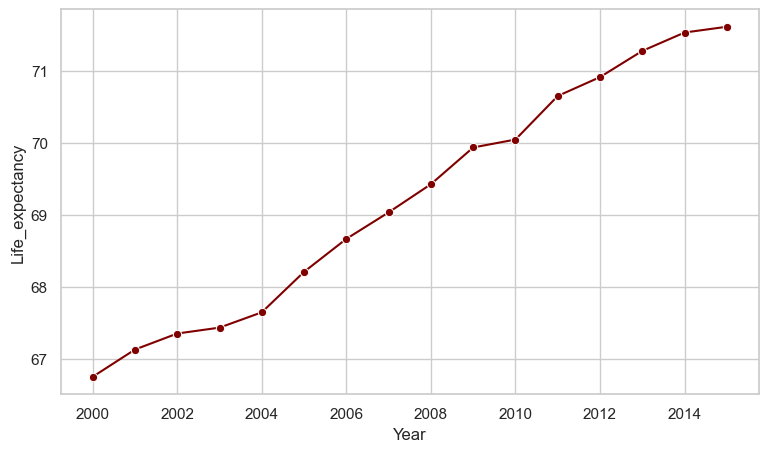

In [138]:
plt.figure(figsize=(9,5))
sns.lineplot(x = 'Year', y = 'Life_expectancy', data = data,color='maroon',marker = 'o' ,ci=None)
plt.show()

### Life Expectancy Across Countries

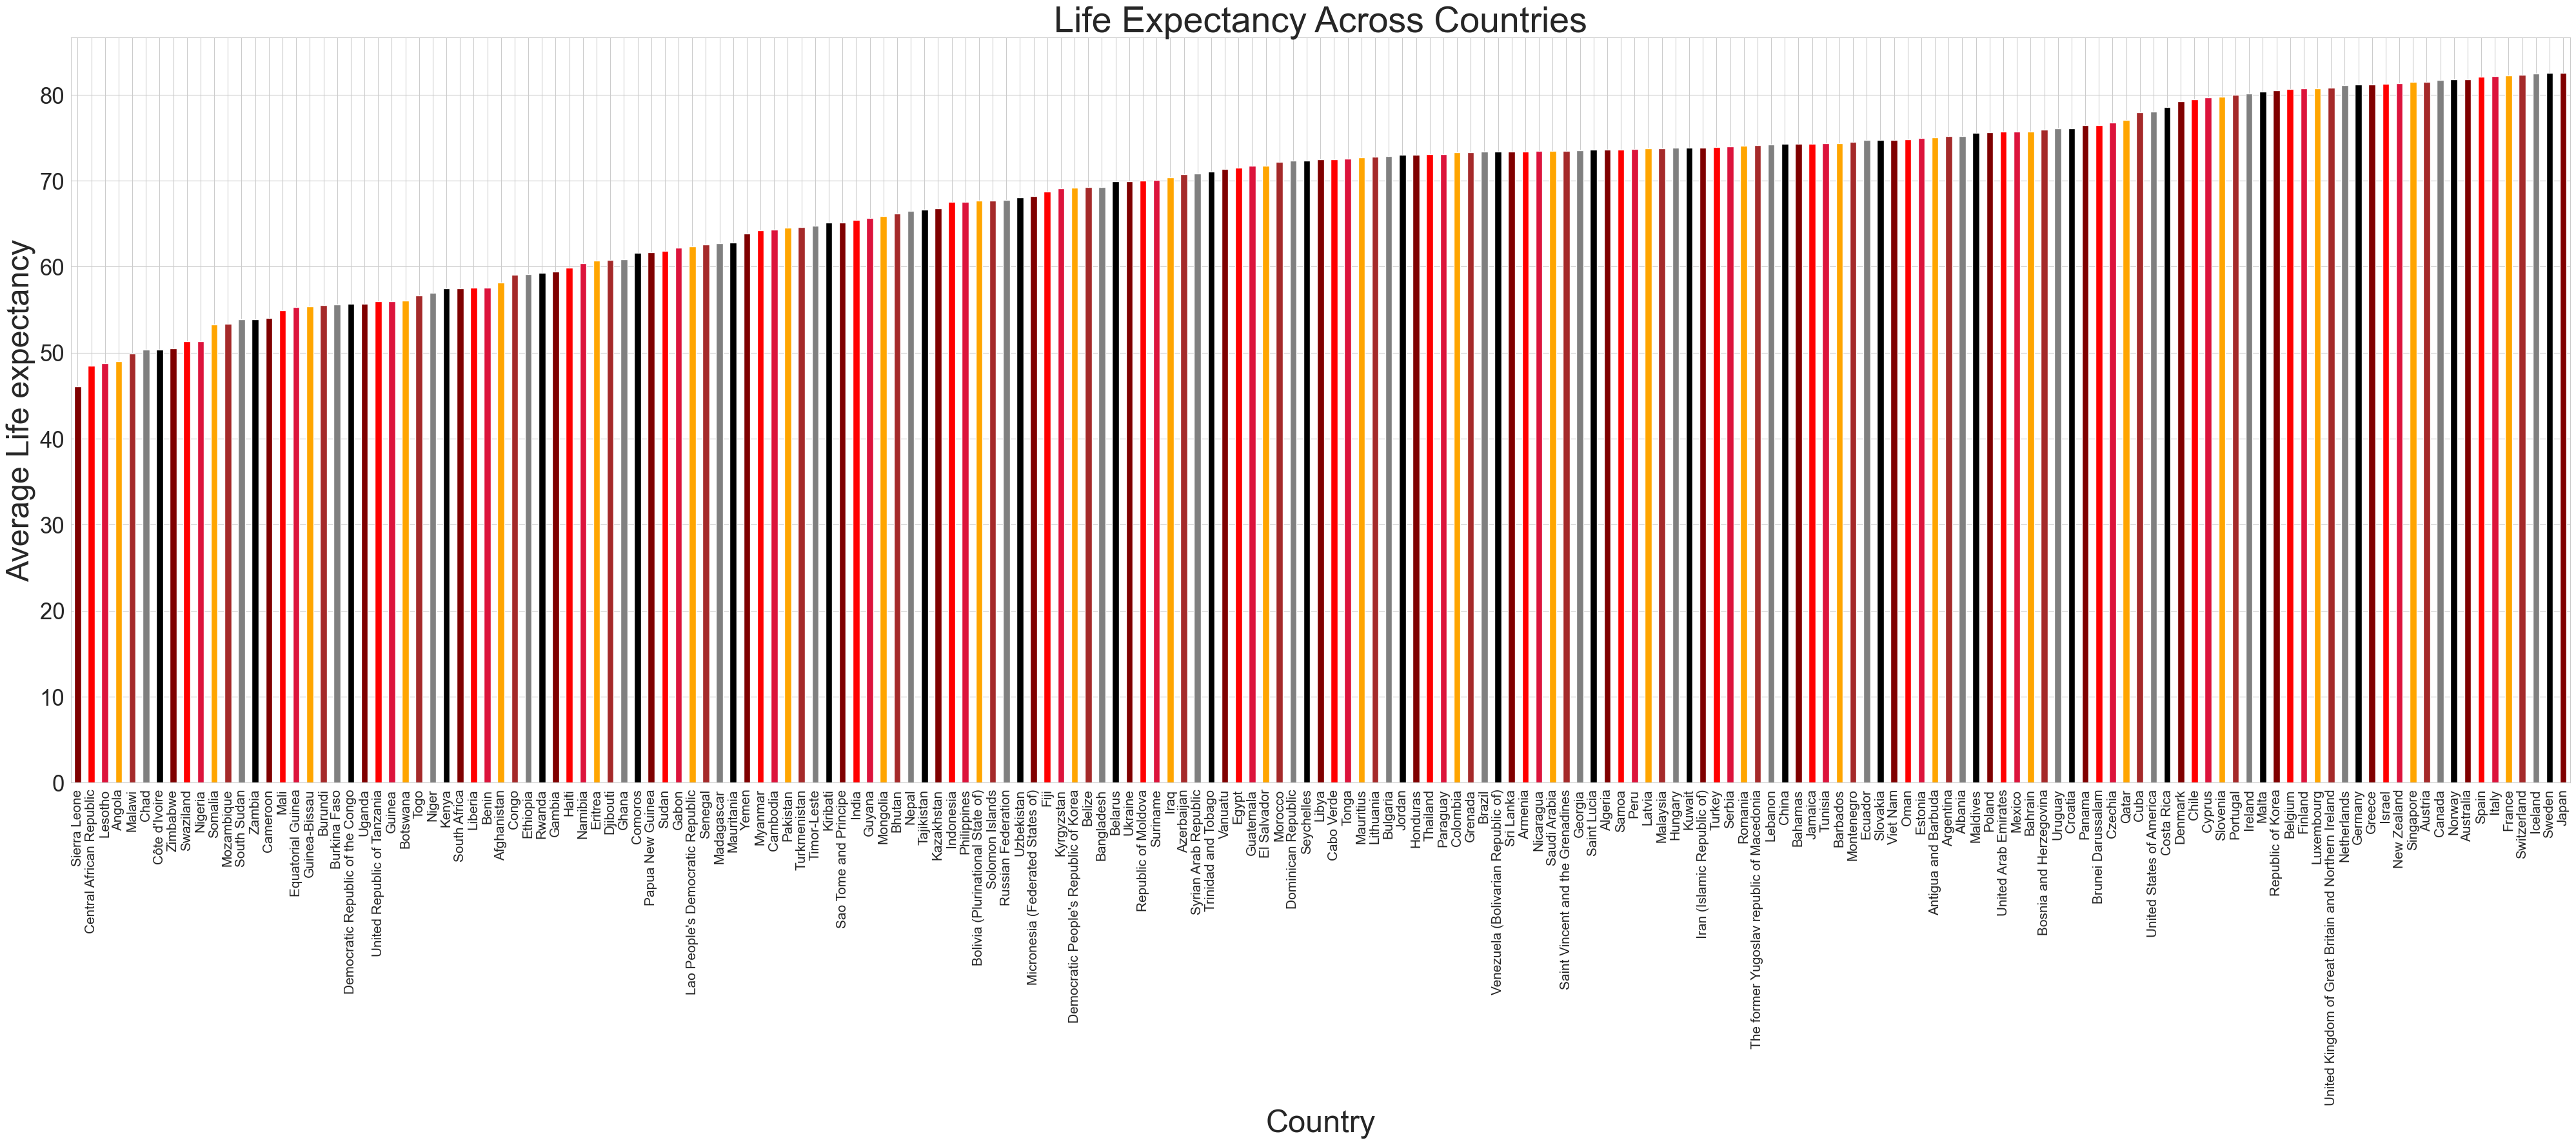

In [29]:
data_filtered = data.dropna(subset=['Life_expectancy'])
life_country = data_filtered.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=True)

my_colors = ['maroon', 'red', 'crimson', 'orange', 'brown', 'grey', 'black']

life_country.plot(kind='bar', figsize=(50, 15), fontsize=25, color=my_colors)
plt.title("Life Expectancy Across Countries", fontsize=40)
plt.xlabel("Country", fontsize=35)
plt.ylabel("Average Life expectancy", fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

### Life expectancy Based on Countries status

In [141]:
color_map = {'Developed': 'grey', 'Developing': 'maroon'}
fig = px.violin(data, x='Status', y='Life_expectancy', color='Status', color_discrete_map=color_map, template='none', box=True, title='Life expectancy Based on Countries status')
fig.show()

### Top 20 Countries with Highest Life Expectancy

Text(0.5, 0, 'Life Expectancy')

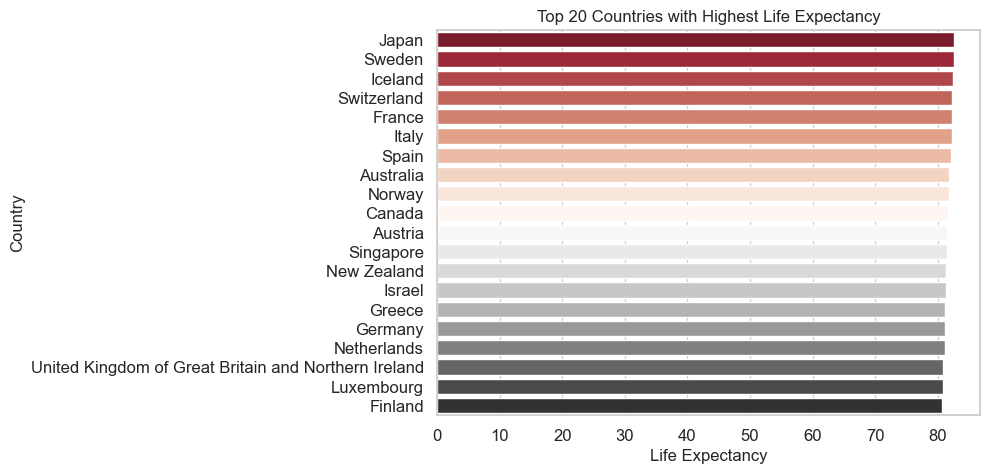

In [144]:
plt.figure(figsize= [7,5])
order= data.groupby("Country").Life_expectancy.mean().nlargest(20).index
sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "RdGy",ci=None)
plt.title("Top 20 Countries with Highest Life Expectancy")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country")
plt.xlabel("Life Expectancy")

### Top 20 Countries with Lowest Life Expectancy


Text(0.5, 0, 'Life Expectancy')

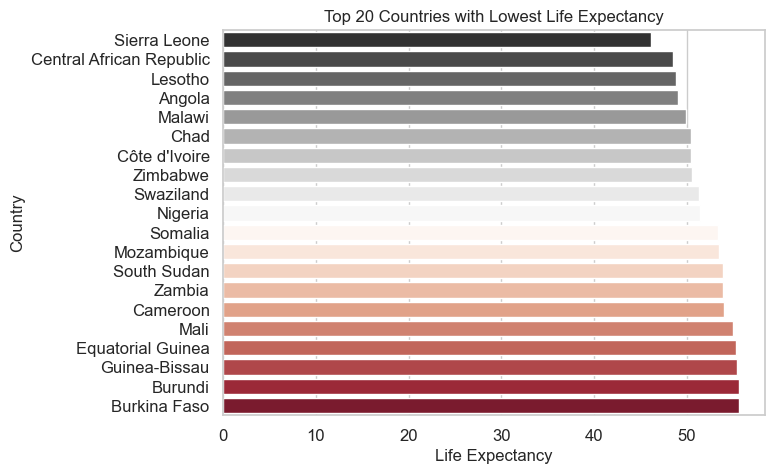

In [145]:
plt.figure(figsize= [7,5])
order=data.groupby("Country").Life_expectancy.mean().sort_values(ascending= True)[:20].index
sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "RdGy_r", ci=None)
plt.title("Top 20 Countries with Lowest Life Expectancy")
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country")
plt.xlabel("Life Expectancy")

### Top 20 Countries with Highest Per Cap Income

Text(0.5, 0, 'Country')

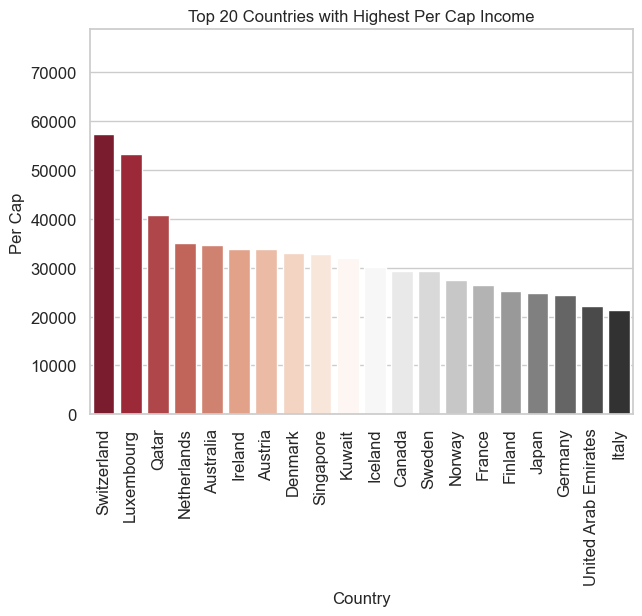

In [155]:
# Top 20 Countries with Highest GDP
plt.figure(figsize= [7,5])
order= data.groupby("Country").GDP.mean().sort_values(ascending= False).head(20).index
sns.barplot(x= "Country", y= "GDP", data=data, order=order, errwidth=False, palette="RdGy")
plt.title("Top 20 Countries with Highest Per Cap Income")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Per Cap")
plt.xlabel("Country")

### Top 20 Countries with Lowest Per Cap Income

Text(0.5, 0, 'Country')

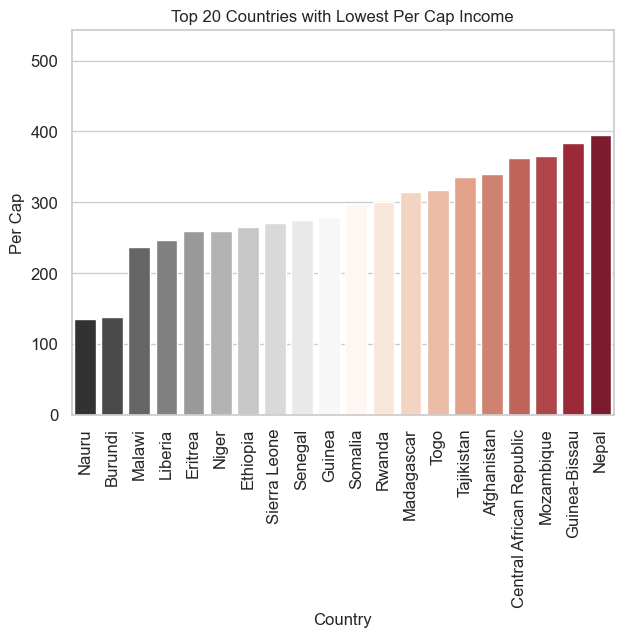

In [156]:
# Top 20 Countries with Lowest GDP
plt.figure(figsize= [7,5])
order= data.groupby("Country").GDP.mean().sort_values(ascending= True).head(20).index
sns.barplot(x= "Country", y= "GDP", data=data, order=order, errwidth=False, palette="RdGy_r")
plt.title("Top 20 Countries with Lowest Per Cap Income")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Per Cap")
plt.xlabel("Country")

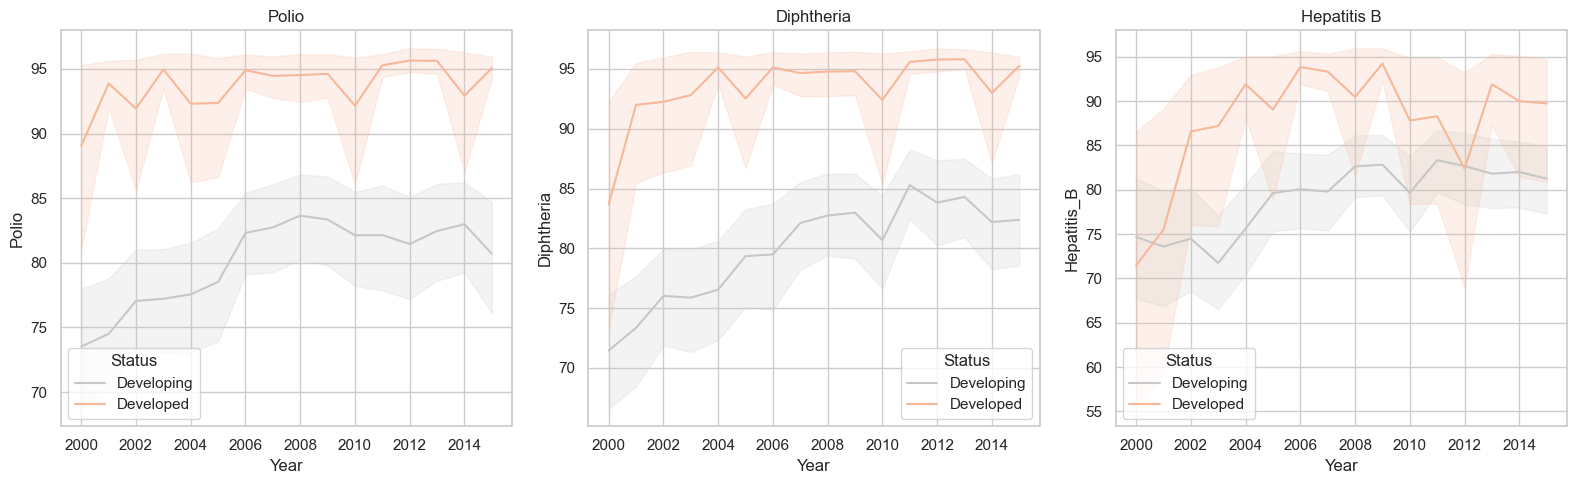

In [56]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(16, 5))

sns.lineplot(data=data, x="Year", y="Polio", hue='Status', palette='RdGy_r', ax=axis[0])
sns.lineplot(data=data, x="Year", y="Diphtheria", hue='Status', palette='RdGy_r', ax=axis[1])
sns.lineplot(data=data, x="Year", y="Hepatitis_B", hue='Status', palette='RdGy_r', ax=axis[2])

axis[0].set_title('Polio')
axis[1].set_title('Diphtheria')
axis[2].set_title('Hepatitis B')

figure.tight_layout()
plt.show()


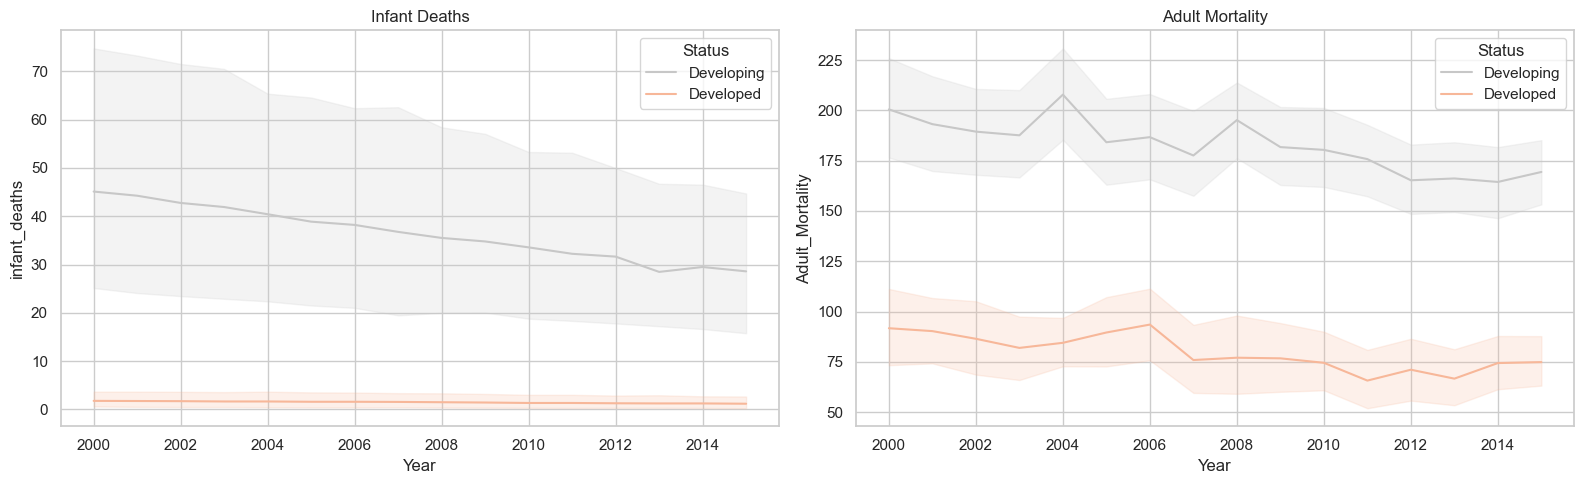

In [59]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.lineplot(data=data, x="Year", y="infant_deaths", hue='Status', palette='RdGy_r', ax=axis[0])
sns.lineplot(data=data, x="Year", y="Adult_Mortality", hue='Status', palette='RdGy_r', ax=axis[1])


axis[0].set_title('Infant Deaths')
axis[1].set_title('Adult Mortality')


figure.tight_layout()
plt.show()

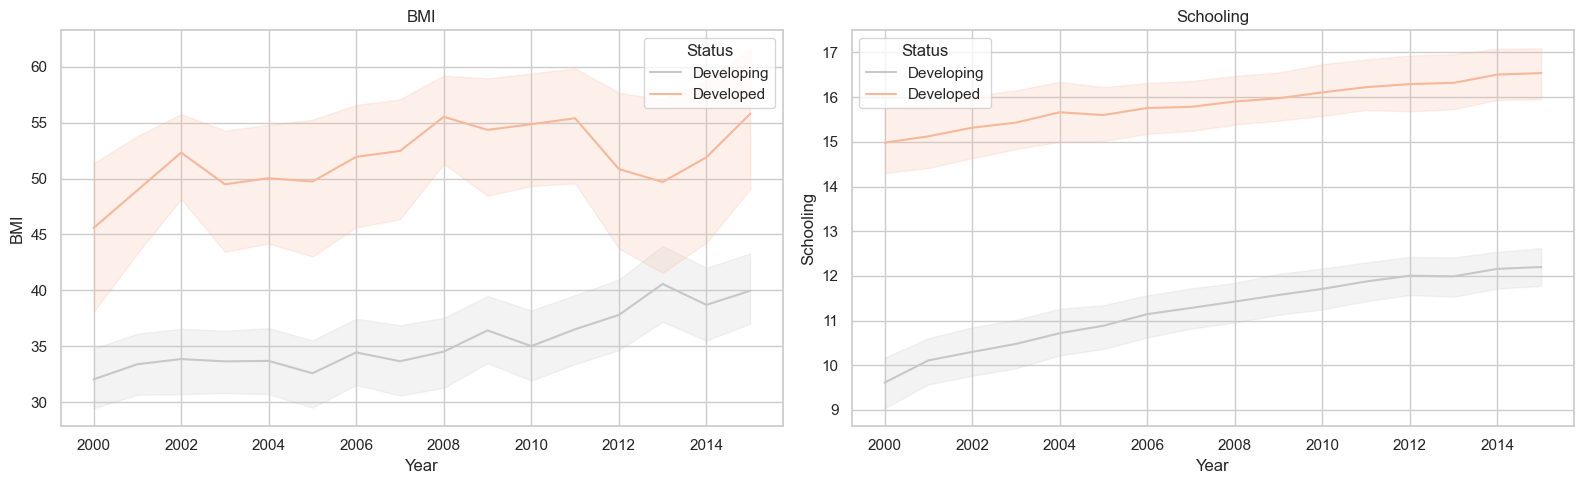

In [60]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.lineplot(data=data, x="Year", y="BMI", hue='Status', palette='RdGy_r', ax=axis[0])
sns.lineplot(data=data, x="Year", y="Schooling", hue='Status', palette='RdGy_r', ax=axis[1])

axis[0].set_title('BMI')
axis[1].set_title('Schooling')

figure.tight_layout()
plt.show()

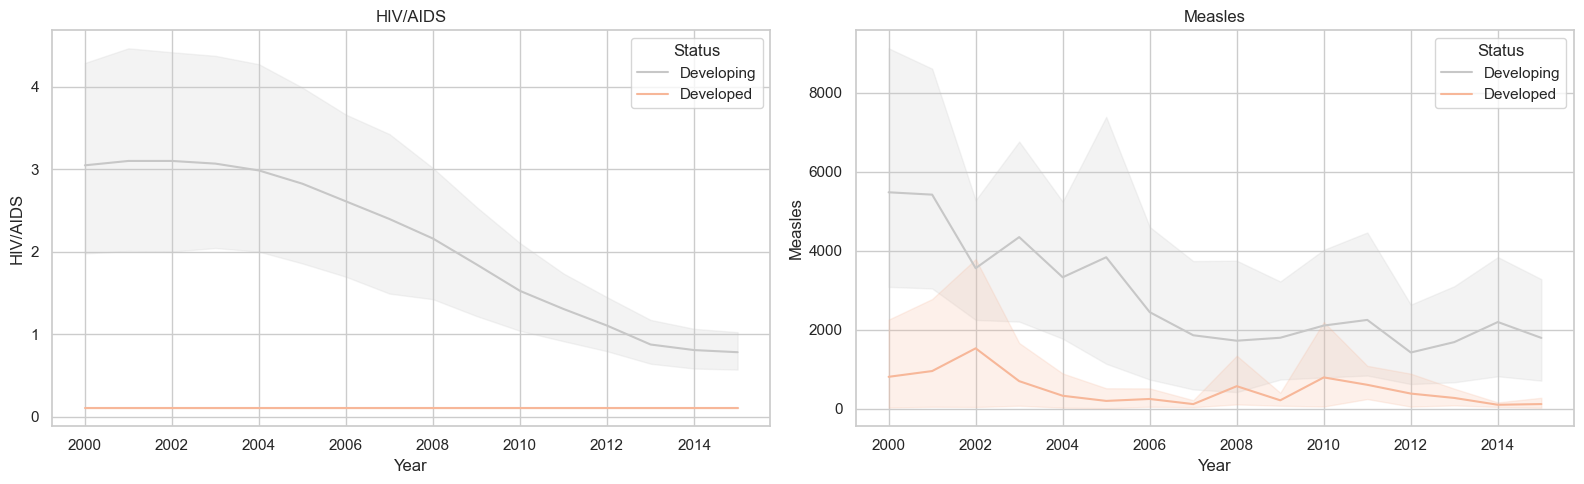

In [62]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.lineplot(data=data, x="Year", y="HIV/AIDS", hue='Status', palette='RdGy_r', ax=axis[0])
sns.lineplot(data=data, x="Year", y="Measles", hue='Status', palette='RdGy_r', ax=axis[1])

axis[0].set_title('HIV/AIDS')
axis[1].set_title('Measles')
figure.tight_layout()
plt.show()

In [74]:
checkna(df)

,Features,Missing_Values,Missing_Percent
3,Adult_Mortality,10,0.34
5,Alcohol,194,6.60
7,Hepatitis_B,553,18.82
9,BMI,34,1.16
11,Polio,19,0.65
12,Total_expenditure,226,7.69
13,Diphtheria,19,0.65
15,GDP,448,15.25
16,Population,652,22.19
17,thinness,34,1.16


In [75]:
def imputer(data, feature, method):
    if method== "mode":
        data[feature]=data[feature].fillna(data[feature].mode()[0])
    elif method== "median":
        data[feature]=data[feature].fillna(data[feature].median())
    else:
        data[feature]=data[feature].fillna(data[feature].mean())

In [76]:
features_missing= df.columns[df.isna().any()]
for feature in features_missing:
    imputer(data= df, feature= feature, method= "mean")

In [77]:
y.fillna(y.median(), inplace=True)

###  Label Encoding

In [78]:
columns= ["Country", "Year", "Status"]
for feature in columns:
    le= LabelEncoder()
    df[feature]= le.fit_transform(df[feature])
    df[feature].astype("int64")

In [81]:
columns= [ 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness',
       'Income_composition_of_resources', 'Schooling']
for feature in columns:
    sc= StandardScaler()
    df[[feature]]= sc.fit_transform(df[[feature]])

### Feature Importance

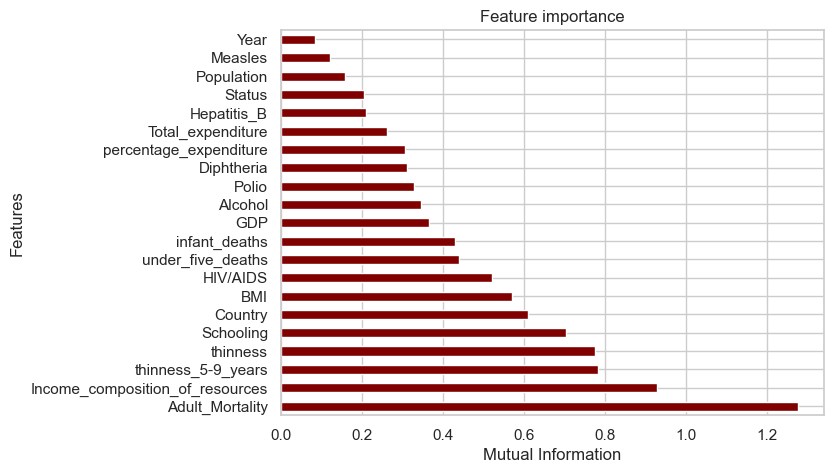

In [150]:
plt.figure(figsize=[7, 5])
pd.Series(mutual_info_regression(df, y), index=df.columns).sort_values(ascending=False).plot(kind="barh", color="maroon")
plt.title("Feature importance")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()

### Model Training and Evaluation

In [94]:
X_train, X_test, y_train, y_test= train_test_split(df, y, test_size= 0.30, random_state=9)

In [116]:
columns = pd.Series(mutual_info_regression(df, y), index=df.columns).sort_values(ascending=False)[:10].index
datacopy = df[columns]
target = y

X_train, X_test, y_train, y_test = train_test_split(datacopy, target, test_size=0.33, random_state=9)

alg = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR()]

train_rmse = []
test_rmse = []
train_accuracy = []
test_accuracy = []

for i in alg:
    model = i
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_rmse.append(np.sqrt(mse(y_train, y_pred_train)))
    test_rmse.append(np.sqrt(mse(y_test, y_pred_test)))
    
    train_accuracy.append((1 - mape(y_train, y_pred_train)) * 100)
    test_accuracy.append((1 - mape(y_test, y_pred_test)) * 100)
    
    print(i, "Train Root Mean Squared error:", train_rmse[-1])
    print(i, "Train Accuracy:", train_accuracy[-1])
    print("-" * 50)
    print(i, "Test Root Mean Squared error:", test_rmse[-1])
    print(i, "Test Accuracy:", test_accuracy[-1])
    print("-" * 70)

RandomForestRegressor() Train Root Mean Squared error: 0.6880717345526145
RandomForestRegressor() Train Accuracy: 99.38026858891459
--------------------------------------------------
RandomForestRegressor() Test Root Mean Squared error: 1.8933795429903706
RandomForestRegressor() Test Accuracy: 98.26010603731675
----------------------------------------------------------------------
AdaBoostRegressor() Train Root Mean Squared error: 2.829094072820975
AdaBoostRegressor() Train Accuracy: 96.61470489369376
--------------------------------------------------
AdaBoostRegressor() Test Root Mean Squared error: 3.010006897503347
AdaBoostRegressor() Test Accuracy: 96.44216960186425
----------------------------------------------------------------------
GradientBoostingRegressor() Train Root Mean Squared error: 1.8384636031853014
GradientBoostingRegressor() Train Accuracy: 98.04811027705486
--------------------------------------------------
GradientBoostingRegressor() Test Root Mean Squared error: 2

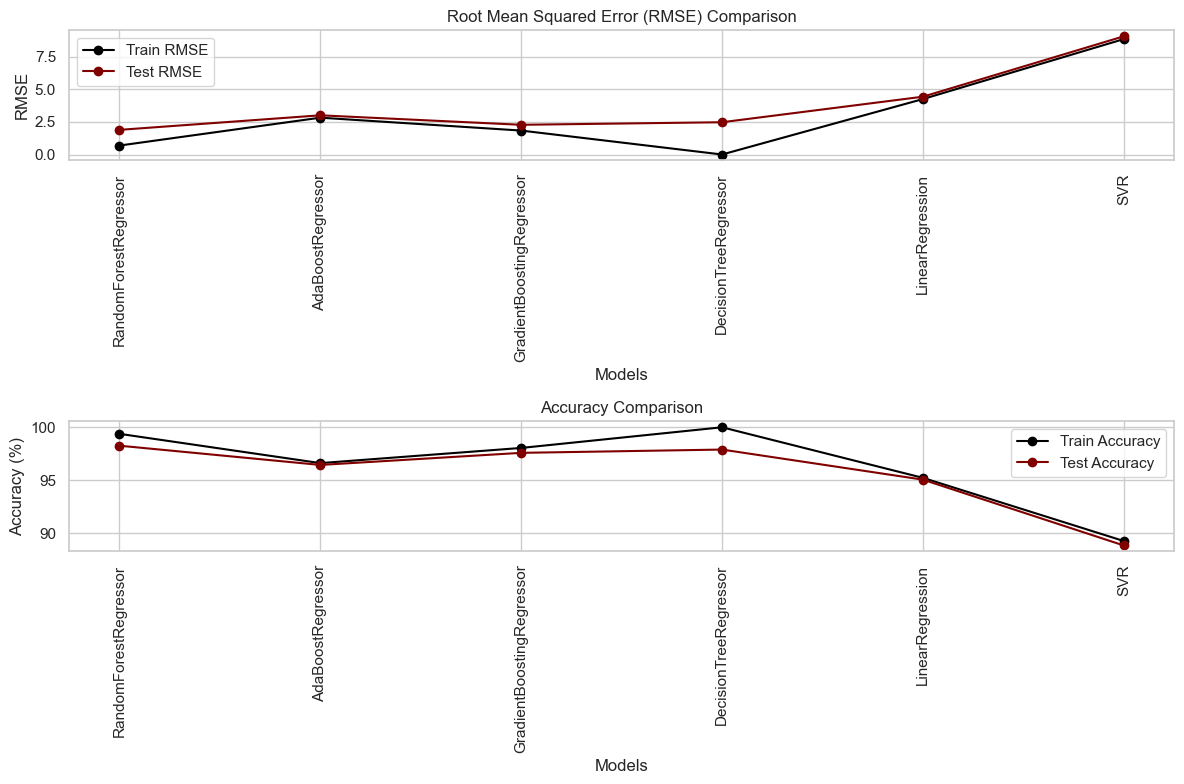

In [125]:
plt.figure(figsize=(12, 8))

# Plotting RMSE
plt.subplot(2, 1, 1)
plt.plot([str(model).split('(')[0] for model in alg], train_rmse, marker='o', label='Train RMSE', color = 'black')
plt.plot([str(model).split('(')[0] for model in alg], test_rmse, marker='o', label='Test RMSE', color = 'maroon')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.legend()

# Plotting Accuracy
plt.subplot(2, 1, 2)
plt.plot([str(model).split('(')[0] for model in alg], train_accuracy, marker='o', label='Train Accuracy', color = 'black')
plt.plot([str(model).split('(')[0] for model in alg], test_accuracy, marker='o', label='Test Accuracy', color = 'maroon')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

Based on the results, RandomForestRegressor model has the lowest RMSE on the test set, indicating better predictive performance compared to the other models. Therefore, the RandomForestRegressor model can be considered the best model for this dataset.